##  Data cleaning and Understanding

In [68]:
# Installing all the required libraries
import pandas as pd
import numpy as np
import sklearn


In [69]:
# importing data using pandas library
#car_price = pd.read_csv("CarPrice_Assignment.csv")
car_price= pd.read_csv(r"C:\Users\user\Desktop\CarPrice.csv",encoding='unicode_escape')

In [70]:
# look at the initial rows
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
# Let's look at some statistical information about our dataframe.
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [72]:
# Columns having all missing values
car_price.isnull().all(axis=0)


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [73]:
# car_id will not explain anything. Hence removing it
car_price = car_price.drop(['car_ID'], axis=1)
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [74]:
# Data cleaning
# creating dummy values for the categorical variables and renaming the column names as required
car_price['symboling'] = car_price['symboling'].map({3: 'sym_3', 2: 'sym_2', 1:'sym_1', 0:'sym_0', -1:'sym_neg1', -2:'sym_neg2'})
symbol = pd.get_dummies(car_price['symboling'],drop_first=True)
car_price = pd.concat([car_price,symbol],axis=1)
car_price.drop(['symboling'],axis=1,inplace=True)

In [75]:
# cleaning the variable CarName
car_price['CarName'] = car_price['CarName'].apply(lambda x:x.split(" ")[0])
car_price['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [76]:
# data correction for CarName variable and creation of dummy variable for the same
di = {'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vw':'volkswagen', 'vokswagen':'volkswagen'}
car_price["CarName"].replace(di, inplace=True)
name = pd.get_dummies(car_price['CarName'],drop_first=True)
car_price = pd.concat([car_price,name],axis=1)
car_price.drop(['CarName'],axis=1,inplace=True)

In [77]:
# dummy variable creation for fueltype,aspiration, doornumber and enginelocation variables
car_price['fueltype'] = car_price['fueltype'].map({'gas': 0, 'diesel': 1})
car_price['aspiration'] = car_price['aspiration'].map({'std': 0, 'turbo': 1})
car_price['doornumber'] = car_price['doornumber'].map({'two': 0, 'four': 1})
car_price['enginelocation'] = car_price['enginelocation'].map({'front': 0, 'rear': 1})

In [78]:
# dummy variable creation for drivewheel
car_price['drivewheel'] = car_price['drivewheel'].map({'rwd': 'drivewheel_rwd', 'fwd': 'drivewheel_fwd', '4wd':'drivewheel_4wd'})
wheel = pd.get_dummies(car_price['drivewheel'],drop_first=True)
car_price = pd.concat([car_price,wheel],axis=1)
car_price.drop(['drivewheel'],axis=1,inplace=True)

In [79]:
# # dummy variable creation for carbody
car_price['carbody'] = car_price['carbody'].map({'convertible': 'carbody_convertible', 'hatchback': 'carbody_hatchback', 'sedan':'carbody_sedan','wagon':'carbody_wagon','hardtop':'carbody_hardtop'})
body = pd.get_dummies(car_price['carbody'],drop_first=True)
car_price = pd.concat([car_price,body],axis=1)
car_price.drop(['carbody'],axis=1,inplace=True)

In [80]:
# dummy variable creation for enginetype
car_price['enginetype'] = car_price['enginetype'].map({'dohc': 'enginetype_dohc','dohcv': 'enginetype_dohcv','ohcf': 'enginetype_ohcf' ,'ohcv': 'enginetype_ohcv', 'ohc': 'enginetype_ohc','l':'enginetype_l','rotor':'enginetype_rotor'})
engtype = pd.get_dummies(car_price['enginetype'],drop_first=True)
car_price = pd.concat([car_price,engtype],axis=1)
car_price.drop(['enginetype'],axis=1,inplace=True)

In [81]:
# # dummy variable creation for cylindernumber
car_price['cylindernumber'] = car_price['cylindernumber'].map({'four': 'cylindernumber_four','five': 'cylindernumber_five','six': 'cylindernumber_six' ,'three': 'cylindernumber_three', 'twelve': 'cylindernumber_twelve','two':'cylindernumber_two','eight':'cylindernumber_eight'})
cylno = pd.get_dummies(car_price['cylindernumber'],drop_first=True)
car_price = pd.concat([car_price,cylno],axis=1)
car_price.drop(['cylindernumber'],axis=1,inplace=True)

In [82]:
# dummy variable creation for fuelsystem
car_price['fuelsystem'] = car_price['fuelsystem'].map({'mpfi':'fuelsystem_mpfi',
'2bbl':'fuelsystem_2bbl','mfi':'fuelsystem_mfi','1bbl':'fuelsystem_1bbl',
'spfi':'fuelsystem_spfi','4bbl':'fuelsystem_4bbl','idi':'fuelsystem_idi','spdi':'fuelsystem_spdi'})
fuelsys = pd.get_dummies(car_price['fuelsystem'],drop_first=True)
car_price = pd.concat([car_price,fuelsys],axis=1)
car_price.drop(['fuelsystem'],axis=1,inplace=True)

In [83]:
# creating a derieved variable stroke to bore ratio
#since stroke to bore ratio seems to have an impact on engine friction. lets see if it has an impact on the model
car_price['stroke_bore'] = car_price['stroke']/car_price['boreratio'] 

In [84]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\user\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


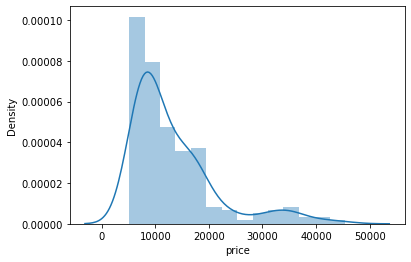

In [186]:
#target variable : price
sns.distplot(car_price['price'])
plt.show()

most of the cars have price range between 5-20000

very few cars have higher price range

<AxesSubplot:>

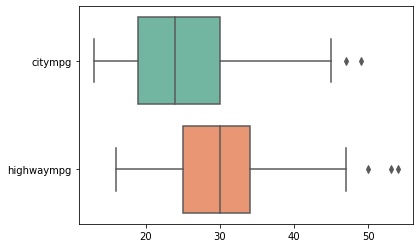

In [85]:
sns.boxplot(data=car_price[['citympg','highwaympg']], orient="h", palette="Set2")

<AxesSubplot:>

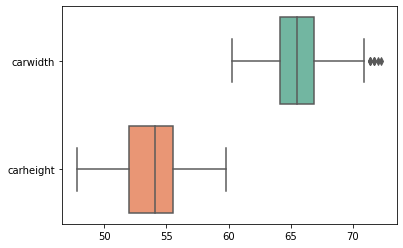

In [86]:
sns.boxplot(data=car_price[['carwidth','carheight']], orient="h", palette="Set2")

C:\Users\user\New folder\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


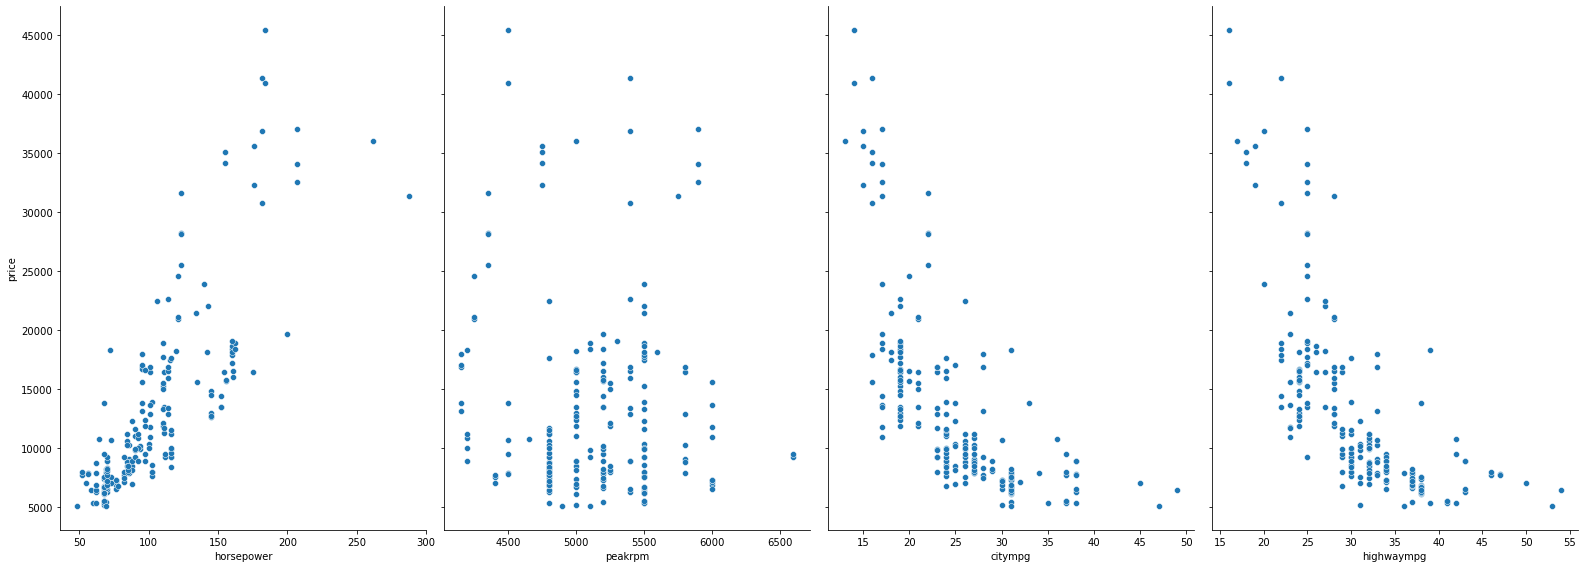

In [87]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(car_price, x_vars=['horsepower','peakrpm','citympg','highwaympg'], y_vars='price',size=8, aspect=0.7, kind='scatter')


#horsepower seems to have a linear trend with the price



#citympg and highwaympg seem to have a negative linear trend

C:\Users\user\New folder\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


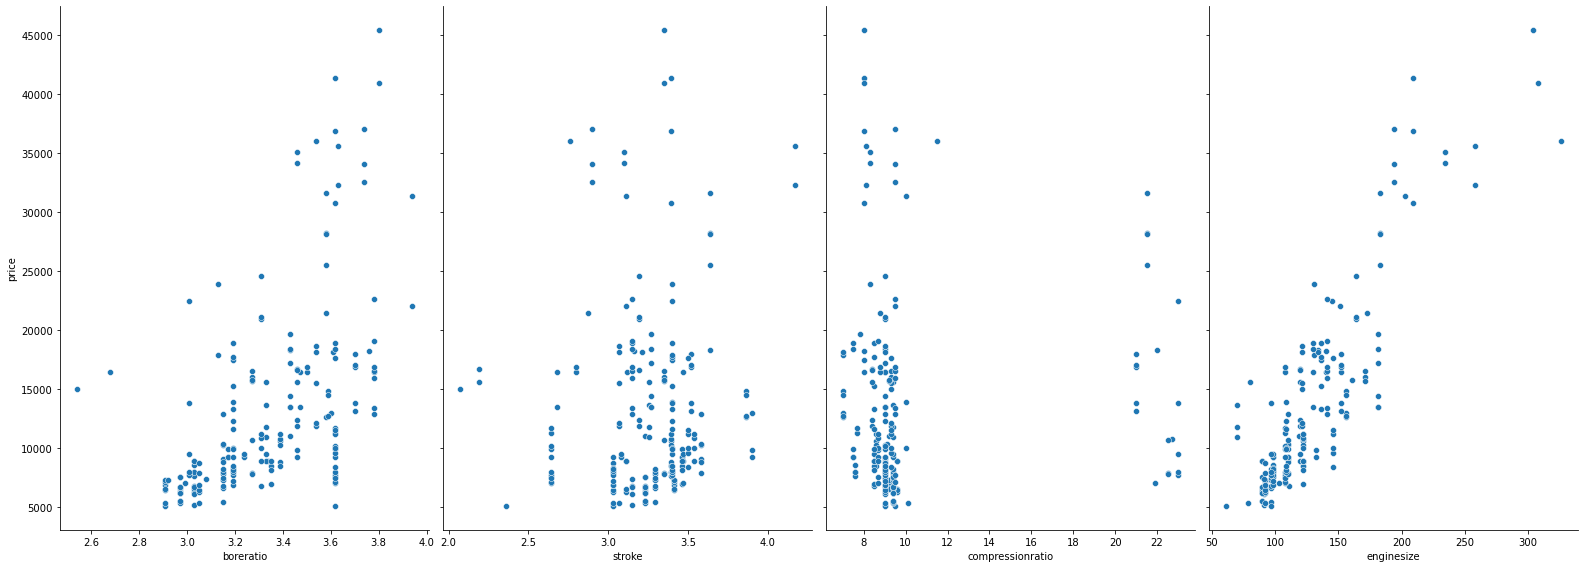

In [88]:
sns.pairplot(car_price, x_vars=['boreratio','stroke','compressionratio','enginesize'], y_vars='price',size=8, aspect=0.7, kind='scatter')

#enginesize seems to have a very good relationship with the target variable

C:\Users\user\New folder\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


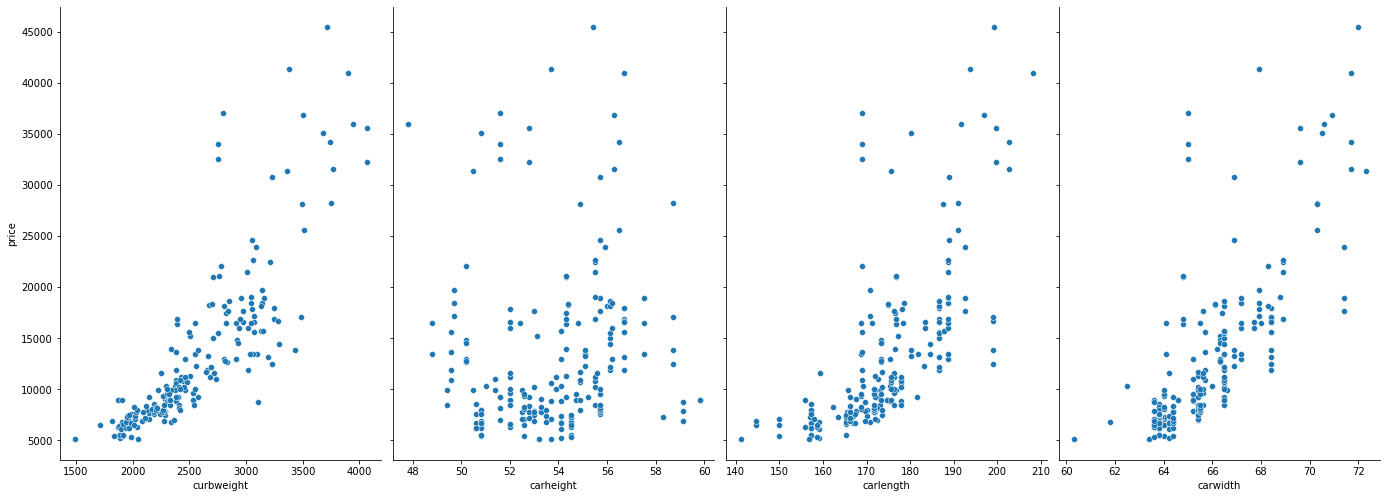

In [89]:
sns.pairplot(car_price, x_vars=['curbweight','carheight','carlength','carwidth'], y_vars='price',size=7, aspect=0.7, kind='scatter')

#curbweight and carwidth seem to have a linear trend with the target variable



#suspecting multicollinearity among the variables having linear trend with target variables

C:\Users\user\New folder\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


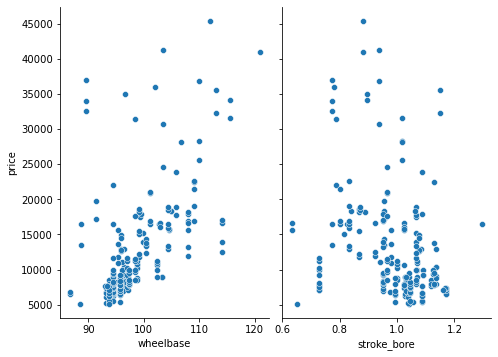

In [90]:
sns.pairplot(car_price, x_vars=['wheelbase','stroke_bore'], y_vars='price',size=5, aspect=0.7, kind='scatter')


#not much trend with wheelbase and stroke_bore ratio with the target variable(price)

<AxesSubplot:>

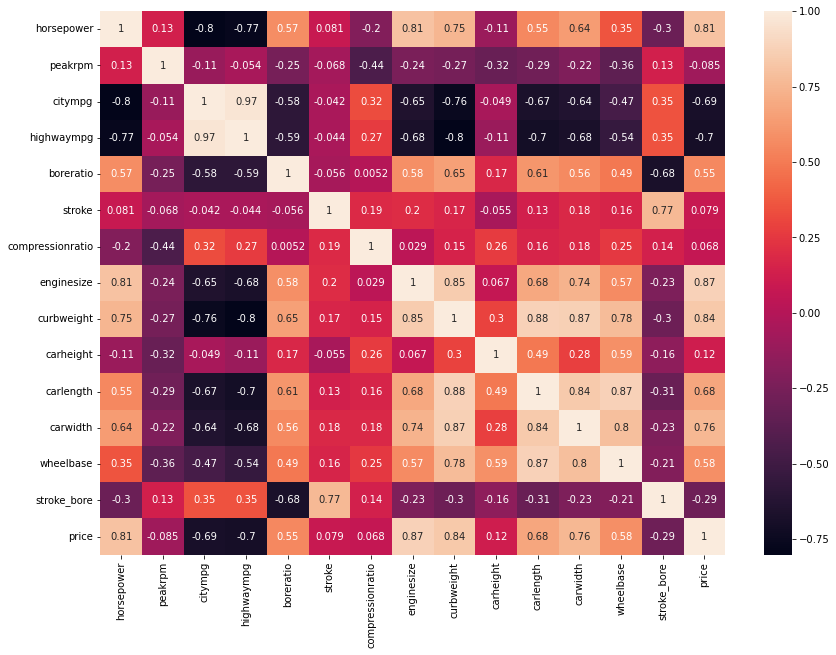

In [91]:
# Lets see if the variable are correlated among eah other
car_corr= car_price[['horsepower','peakrpm','citympg','highwaympg','boreratio','stroke','compressionratio','enginesize','curbweight',
                 'carheight','carlength','carwidth','wheelbase','stroke_bore','price']]
plt.figure(figsize = (14,10))
sns.heatmap(car_corr.corr(),annot = True)

#variables are highly correlated among one another. suspecting multi-collinearity issue during model building



#highwaympg and citympg are highly correlated and inturn they are highly correlated with price as well



#enginesize and horsepower and highly correlated and are also highly correlated with price.



#hence enginesize or horsepower can be a  very good precitor

In [92]:
# Putting feature variable to X
X = car_price.drop(['price'], axis=1)
X.head()

# Putting response variable to y
y = car_price['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# splitting the data into training and testing 

In [103]:
# splittting the data into training and testing ( this can be avoided as the datasize is small)
from sklearn.model_selection import train_test_split
import random
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size=0.2, random_state=100)

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
# User defined function for calculating VARIANCE INFLATION FACTOR value to be used later on
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [106]:
## Idea is to use RFE to reduce the total number of variables to some extent and then manually eliminate using VIF and p-value 
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels doesn't automatically fit a constant, 
#so we need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const              60231.174728
fueltype            1839.242885
aspiration          2624.466863
doornumber           330.709508
enginelocation      5988.489336
                       ...     
fuelsystem_mfi     -2876.013922
fuelsystem_mpfi    -1243.399468
fuelsystem_spdi    -1505.264757
fuelsystem_spfi        0.000000
stroke_bore       -65188.763703
Length: 70, dtype: float64

In [107]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     64.21
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           9.16e-60
Time:                        21:27:12   Log-Likelihood:                -1394.2
No. Observations:                 164   AIC:                             2916.
Df Residuals:                     100   BIC:                             3115.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.023e+

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 69)
(41, 69)
(164,)
(41,)


In [112]:
import sklearn.feature_selection
from sklearn.feature_selection import RFE
lm= LinearRegression()
lm.fit(X_train_sm,y_train)
rfe1= RFE(lm,n_features_to_select=None) # running RFE  
rfe1=rfe1.fit(X_train_sm, y_train)
print(rfe1.support_)           # Printing the boolean results
print(rfe1.ranking_)

[False False  True False  True False False  True False False False  True
  True False False False False False  True  True  True False  True  True
  True  True False False False  True  True False False False False  True
 False  True  True  True  True False  True False False  True  True  True
  True  True  True False  True  True False  True  True  True False  True
  True  True False False False False False False False  True]
[11 19  1 24  1 21 30  1 20 34 14  1  1 28 29 33 22 32  1  1  1 23  1  1
  1  1  4 10  7  1  1  9 35 25  6  1 16  1  1  1  1  8  1  5 26  1  1  1
  1  1  1  2  1  1 31  1  1  1 12  1  1  1 27 18 13  3 17 15 36  1]


In [113]:
X_train_sm.columns

Index(['const', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'sym_1', 'sym_2', 'sym_3',
       'sym_neg1', 'sym_neg2', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'drivewheel_fwd', 'drivewheel_rwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl',

In [ ]:
# In the overall model with 68 variables, P-value of few variables eliminated by RFE are less than 0.05.
#Hence retaining the below variables for further iterations:
# aspiration, wheelbase,curbweight,enginesize,carheight,stroke,horsepower,enginesize,peakrpm,mercury,plymouth


In [115]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_1 = X_train.drop(['doornumber','carlength','citympg','highwaympg'
                          ,'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo','drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3555050623.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_1 = X_train.drop(['doornumber','carlength','citympg','highwaympg'


In [116]:
# Adding a constant variable 
X_train_1 = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     76.11
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.03e-68
Time:                        21:39:30   Log-Likelihood:                -1418.3
No. Observations:                 164   AIC:                             2931.
Df Residuals:                     117   BIC:                             3076.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.478e+

In [125]:
X_train_1.columns

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'sym_3', 'sym_neg2',
       'audi', 'bmw', 'buick', 'isuzu', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'drivewheel_fwd', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'stroke_bore'],
      dtype='object')

In [123]:
lm= LinearRegression()
rfe = RFE(lm,n_features_to_select= 35)  # running RFE
rfe = rfe.fit(X_train_1, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True False  True False False False  True  True False False
 False  True  True  True  True  True  True False False  True False False
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True]
[12  1  1  8  1 10 15  7  1  1 14 13 16  1  1  1  1  1  1 11 17  1  4  5
  6  1  9  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  3  2  1]


In [124]:
X_train_1.columns

Index(['fueltype', 'aspiration', 'enginelocation', 'wheelbase', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'sym_3', 'sym_neg2',
       'audi', 'bmw', 'buick', 'isuzu', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'drivewheel_fwd', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'stroke_bore'],
      dtype='object')

In [ ]:
# In the lm_1 with 52 variables, P-value of few variables eliminated by RFE has less than 0.05.
#Hence retaining the few variables
# aspiration, wheelbase,curbweight,enginesize,carheight for further analysis etc

In [126]:
# Creating X_train_2 dataframe by dropping variables from X_test
X_train_2 = X_train_1.drop(['wheelbase'
                          ,'carheight','horsepower','isuzu','nissan','plymouth'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1596041987.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_2 = X_train_1.drop(['wheelbase'


In [127]:
# Adding a constant variable 
X_train_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     84.32
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           2.71e-72
Time:                        21:49:51   Log-Likelihood:                -1425.2
No. Observations:                 164   AIC:                             2932.
Df Residuals:                     123   BIC:                             3059.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.461e+

In [130]:
lm= LinearRegression()
rfe = RFE(lm, n_features_to_select=30)             # running RFE
rfe = rfe.fit(X_train_2, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False  True  True False False False  True  True False False False
  True  True  True  True False False  True  True False  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True False False  True  True  True False  True  True]
[ 6  5  1  1  3 15 11  1  1 14 16 12  1  1  1  1  8 17  1  1  4  1  1  1
  1  1  1  1  1  1  1  1 13  2  1  1  1  1  7  9  1  1  1 10  1  1]


In [131]:
X_train_2.columns

Index(['const', 'fueltype', 'aspiration', 'enginelocation', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'sym_3', 'sym_neg2', 'audi', 'bmw', 'buick', 'mazda',
       'mercury', 'mitsubishi', 'peugeot', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'drivewheel_fwd', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'stroke_bore'],
      dtype='object')

In [132]:
# Creating X_train_3 dataframe by dropping variables from X_test
X_train_3 = X_train_2.drop(['mazda'
                          ,'enginetype_dohcv'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1476679882.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_3 = X_train_2.drop(['mazda'


In [133]:
# Adding a constant variable 
X_train_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     89.77
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.00e-74
Time:                        21:52:37   Log-Likelihood:                -1425.6
No. Observations:                 164   AIC:                             2929.
Df Residuals:                     125   BIC:                             3050.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.694e+

In [137]:
lm=LinearRegression()
rfe = RFE(lm, n_features_to_select=30) # running RFE
rfe = rfe.fit(X_train_3, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True  True False False False False  True False False False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True False  True  True]
[ 6  1  1  2 12  8 11  1 10 13  5  1  1  1  1 14  1  3  1  1  1  1  1  1
  1  1  1  1  1  4  1  1  1  1  1  1  7  1  1  1  9  1  1]


In [138]:
X_train_3.columns

Index(['fueltype', 'aspiration', 'enginelocation', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'sym_3', 'sym_neg2', 'audi', 'bmw', 'buick', 'mercury', 'mitsubishi',
       'peugeot', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'drivewheel_fwd', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'stroke_bore'],
      dtype='object')

In [139]:
# Creating X_train_4 dataframe by dropping variables from X_test
X_train_4 = X_train_3.drop(['fueltype'
                          ,'compressionratio','sym_3','fuelsystem_idi'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2409346295.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_4 = X_train_3.drop(['fueltype'


In [140]:
# Adding a constant variable 
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     96.47
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           3.28e-76
Time:                        21:55:30   Log-Likelihood:                -1428.3
No. Observations:                 164   AIC:                             2929.
Df Residuals:                     128   BIC:                             3040.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.135e+

In [142]:
lm=LinearRegression()
rfe = RFE(lm, n_features_to_select=30) # running RFE
rfe = rfe.fit(X_train_4, y_train)
print(rfe.support_)  # Printing the boolean results
print(rfe.ranking_)

[ True False  True False False False  True  True False  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True False  True
  True  True  True  True]
[ 1  2  1  4  9  8  1  1 10  1  1  1  1 11  1  6  1  1  1  1  1  1  1  1
  1  3  1  7  1  1  1  1  1  1  5  1  1  1  1  1]


In [143]:
X_train_4.columns

Index(['const', 'aspiration', 'enginelocation', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'peakrpm', 'sym_neg2', 'audi',
       'bmw', 'buick', 'mercury', 'mitsubishi', 'peugeot', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'drivewheel_fwd',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_4bbl',
       'fuelsystem_mfi', 'stroke_bore'],
      dtype='object')

In [144]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_5 = X_train_4.drop(['enginetype_ohc'], 1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2292933546.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_5 = X_train_4.drop(['enginetype_ohc'], 1)


In [145]:
# Adding a constant variable 
X_train_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     97.59
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.53e-76
Time:                        21:57:27   Log-Likelihood:                -1430.2
No. Observations:                 164   AIC:                             2930.
Df Residuals:                     129   BIC:                             3039.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.318e+

## lets us make use of VIF and eliminate the variables manually

In [146]:
X_train_5.shape

(164, 39)

In [147]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
14,peugeot,inf
34,cylindernumber_two,inf
26,enginetype_ohcf,inf
25,enginetype_l,inf
1,enginelocation,inf
18,subaru,inf
32,cylindernumber_three,inf
28,enginetype_rotor,inf
2,carwidth,7231.64
6,stroke,7198.21


In [148]:
# Creating X_train_6 dataframe by dropping variables from X_test
X_train_6 = X_train_5.drop(['cylindernumber_six'], 1)
# Adding a constant variable 
X_train_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     101.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.69e-77
Time:                        22:01:14   Log-Likelihood:                -1430.4
No. Observations:                 164   AIC:                             2929.
Df Residuals:                     130   BIC:                             3034.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.343e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\9135831.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_6 = X_train_5.drop(['cylindernumber_six'], 1)


In [149]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
18,subaru,inf
14,peugeot,inf
33,cylindernumber_two,inf
31,cylindernumber_three,inf
28,enginetype_rotor,inf
26,enginetype_ohcf,inf
25,enginetype_l,inf
1,enginelocation,inf
2,carwidth,7180.60
6,stroke,7119.16


In [150]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_7 = X_train_6.drop(['fuelsystem_4bbl'], 1)
# Adding a constant variable 
X_train_7 = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     104.7
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           2.11e-78
Time:                        22:03:28   Log-Likelihood:                -1430.7
No. Observations:                 164   AIC:                             2927.
Df Residuals:                     131   BIC:                             3030.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.291e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1079420975.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_7 = X_train_6.drop(['fuelsystem_4bbl'], 1)


In [151]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six','fuelsystem_4bbl','carbody_sedan'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
30,cylindernumber_three,inf
32,cylindernumber_two,inf
27,enginetype_rotor,inf
18,subaru,inf
1,enginelocation,inf
14,peugeot,inf
24,enginetype_l,inf
25,enginetype_ohcf,inf
6,stroke,6867.67
2,carwidth,6827.08


In [152]:
# Creating X_train_8 dataframe by dropping variables from X_test
X_train_8 = X_train_7.drop(['carbody_sedan'], 1)
# Adding a constant variable 
X_train_8 = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     108.4
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           2.71e-79
Time:                        22:04:15   Log-Likelihood:                -1431.1
No. Observations:                 164   AIC:                             2926.
Df Residuals:                     132   BIC:                             3025.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.408e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2056313110.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_8 = X_train_7.drop(['carbody_sedan'], 1)


In [153]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six','fuelsystem_4bbl','carbody_sedan'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
30,cylindernumber_three,inf
32,cylindernumber_two,inf
27,enginetype_rotor,inf
18,subaru,inf
1,enginelocation,inf
14,peugeot,inf
24,enginetype_l,inf
25,enginetype_ohcf,inf
6,stroke,6867.67
2,carwidth,6827.08


In [154]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_9 = X_train_8.drop(['cylindernumber_five'], 1)
# Adding a constant variable 
X_train_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     111.9
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.24e-80
Time:                        22:04:52   Log-Likelihood:                -1431.7
No. Observations:                 164   AIC:                             2925.
Df Residuals:                     133   BIC:                             3022.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.026e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\160114222.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_9 = X_train_8.drop(['cylindernumber_five'], 1)


In [155]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                        'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
1,enginelocation,inf
30,cylindernumber_two,inf
28,cylindernumber_three,inf
23,enginetype_l,inf
26,enginetype_rotor,inf
17,subaru,inf
24,enginetype_ohcf,inf
14,peugeot,inf
2,carwidth,6662.31
6,stroke,6298.38


In [156]:
# Creating X_train_10 dataframe by dropping variables from X_test
X_train_10 = X_train_9.drop(['renault'], 1)
# Adding a constant variable 
X_train_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_10).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     116.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           5.12e-81
Time:                        22:05:38   Log-Likelihood:                -1432.1
No. Observations:                 164   AIC:                             2924.
Df Residuals:                     134   BIC:                             3017.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.035e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2209237078.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_10 = X_train_9.drop(['renault'], 1)


In [157]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                        'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
16,subaru,inf
14,peugeot,inf
29,cylindernumber_two,inf
27,cylindernumber_three,inf
25,enginetype_rotor,inf
23,enginetype_ohcf,inf
22,enginetype_l,inf
1,enginelocation,inf
2,carwidth,6612.85
6,stroke,6152.93


In [158]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_11 = X_train_10.drop(['saab'], 1)
# Adding a constant variable 
X_train_11 = sm.add_constant(X_train_11)
lm_11 = sm.OLS(y_train,X_train_11).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     120.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           5.61e-82
Time:                        22:06:23   Log-Likelihood:                -1432.3
No. Observations:                 164   AIC:                             2923.
Df Residuals:                     135   BIC:                             3013.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.387e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2667541761.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_11 = X_train_10.drop(['saab'], 1)


In [159]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                        'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
16,subaru,inf
28,cylindernumber_two,inf
26,cylindernumber_three,inf
24,enginetype_rotor,inf
22,enginetype_ohcf,inf
21,enginetype_l,inf
14,peugeot,inf
1,enginelocation,inf
6,stroke,5540.27
2,carwidth,5392.32


In [160]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_12 = X_train_11.drop(['drivewheel_fwd'], 1)
# Adding a constant variable 
X_train_12 = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train,X_train_12).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     125.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           8.65e-83
Time:                        22:06:34   Log-Likelihood:                -1433.0
No. Observations:                 164   AIC:                             2922.
Df Residuals:                     136   BIC:                             3009.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.669e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1713875098.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_12 = X_train_11.drop(['drivewheel_fwd'], 1)


In [161]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
16,subaru,inf
28,cylindernumber_two,inf
26,cylindernumber_three,inf
24,enginetype_rotor,inf
22,enginetype_ohcf,inf
21,enginetype_l,inf
14,peugeot,inf
1,enginelocation,inf
6,stroke,5540.27
2,carwidth,5392.32


In [162]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_13 = X_train_12.drop(['carbody_hatchback'], 1)
# Adding a constant variable 
X_train_13 = sm.add_constant(X_train_13)
lm_13 = sm.OLS(y_train,X_train_13).fit()
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           2.52e-83
Time:                        22:06:45   Log-Likelihood:                -1434.5
No. Observations:                 164   AIC:                             2923.
Df Residuals:                     137   BIC:                             3007.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.393e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\2468546369.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_13 = X_train_12.drop(['carbody_hatchback'], 1)


In [163]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hatchback'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
16,subaru,inf
27,cylindernumber_two,inf
25,cylindernumber_three,inf
23,enginetype_rotor,inf
21,enginetype_ohcf,inf
20,enginetype_l,inf
14,peugeot,inf
1,enginelocation,inf
6,stroke,5538.33
2,carwidth,5386.69


In [164]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_14 = X_train_13.drop(['carbody_hardtop'], 1)
# Adding a constant variable 
X_train_14 = sm.add_constant(X_train_14)
lm_14 = sm.OLS(y_train,X_train_14).fit()
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.77e-84
Time:                        22:06:50   Log-Likelihood:                -1435.4
No. Observations:                 164   AIC:                             2923.
Df Residuals:                     138   BIC:                             3003.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.858e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3361205008.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_14 = X_train_13.drop(['carbody_hardtop'], 1)


In [165]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd','carbody_hatchback','carbody_hardtop'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
14,peugeot,inf
1,enginelocation,inf
26,cylindernumber_two,inf
24,cylindernumber_three,inf
22,enginetype_rotor,inf
20,enginetype_ohcf,inf
19,enginetype_l,inf
16,subaru,inf
6,stroke,5537.39
2,carwidth,5374.85


In [166]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_15 = X_train_14.drop(['mercury'], 1)
# Adding a constant variable 
X_train_15 = sm.add_constant(X_train_15)
lm_15 = sm.OLS(y_train,X_train_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     133.0
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.77e-84
Time:                        22:07:25   Log-Likelihood:                -1435.4
No. Observations:                 164   AIC:                             2923.
Df Residuals:                     138   BIC:                             3003.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.858e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1856820558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_15 = X_train_14.drop(['mercury'], 1)


In [167]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                        'carbody_hardtop','mercury','carbody_hatchback'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
18,enginetype_l,inf
25,cylindernumber_two,inf
23,cylindernumber_three,inf
21,enginetype_rotor,inf
19,enginetype_ohcf,inf
13,peugeot,inf
1,enginelocation,inf
15,subaru,inf
6,stroke,5521.44
2,carwidth,5374.33


In [168]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_16 = X_train_15.drop(['sym_neg2'], 1)
# Adding a constant variable 
X_train_16 = sm.add_constant(X_train_16)
lm_16 = sm.OLS(y_train,X_train_16).fit()
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     134.7
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.06e-84
Time:                        22:07:30   Log-Likelihood:                -1438.2
No. Observations:                 164   AIC:                             2926.
Df Residuals:                     139   BIC:                             3004.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.401e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1370602714.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_16 = X_train_15.drop(['sym_neg2'], 1)


In [169]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hardtop','sym_neg2','carbody_hatchback'], axis=1),
                          dependent_col="price")

C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)
C:\Users\user\AppData\Local\Temp\ipykernel_12652\3953437159.py:10: RuntimeWarning:

,Var,Vif
18,enginetype_l,inf
25,cylindernumber_two,inf
23,cylindernumber_three,inf
21,enginetype_rotor,inf
19,enginetype_ohcf,inf
13,peugeot,inf
1,enginelocation,inf
15,subaru,inf
6,stroke,5501.32
2,carwidth,5313.79


In [170]:
# Creating X_train_1 dataframe by dropping variables from X_test
X_train_17 = X_train_16.drop(['carbody_wagon'], 1)
# Adding a constant variable 
X_train_17 = sm.add_constant(X_train_17)
lm_17 = sm.OLS(y_train,X_train_17).fit()
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.25e-84
Time:                        22:07:54   Log-Likelihood:                -1439.7
No. Observations:                 164   AIC:                             2927.
Df Residuals:                     140   BIC:                             3002.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.136e+

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1953392327.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_17 = X_train_16.drop(['carbody_wagon'], 1)


In [171]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hardtop','sym_neg2','carbody_wagon','mercury','cylindernumber_two','peugeot',
                          'enginetype_ohcf','carwidth','boreratio','curbweight','stroke','peakrpm','cylindernumber_four','enginelocation','carbody_hatchback','enginetype_ohcv'], axis=1),
                          dependent_col="price")

,Var,Vif
1,enginesize,17.26
14,stroke_bore,14.01
4,buick,1.63
0,aspiration,1.50
9,enginetype_l,1.33
8,toyota,1.31
12,cylindernumber_twelve,1.27
6,porsche,1.26
3,bmw,1.22
5,mitsubishi,1.19


In [172]:
#In the next step we will eliminate the variables by trial and error to see if it has an impact on VIF and p - value
#After many iterations of trial and error, the following variables are found to add not enough information to the model

#X_train_18 = X_train_17.drop(['carwidth','boreratio','curbweight','stroke','peakrpm'], 1)
X_train_18 = X_train_17.drop(['stroke_bore','cylindernumber_two','peugeot','enginetype_ohcf',
                              'carwidth','boreratio','curbweight','stroke','peakrpm',
                              'cylindernumber_four','enginelocation','enginetype_ohcv',
                             'cylindernumber_three','enginetype_l','cylindernumber_twelve','subaru','toyota'], 1)

# Adding a constant variable 
X_train_18 = sm.add_constant(X_train_18)
lm_18 = sm.OLS(y_train,X_train_18).fit()
print(lm_18.summary())

C:\Users\user\AppData\Local\Temp\ipykernel_12652\1938891160.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_18 = X_train_17.drop(['stroke_bore','cylindernumber_two','peugeot','enginetype_ohcf',


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     166.6
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.14e-74
Time:                        22:08:22   Log-Likelihood:                -1505.0
No. Observations:                 164   AIC:                             3030.
Df Residuals:                     154   BIC:                             3061.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5987.0555    709.255  

In [173]:
X_train_18 = X_train_18.drop(['const'],1)
X_test_New = X_test.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hardtop','sym_neg2','carbody_wagon','mercury','cylindernumber_two','peugeot',
                          'enginetype_ohcf','carwidth','boreratio','curbweight','stroke','peakrpm','cylindernumber_four','enginelocation','carbody_hatchback','enginetype_ohcv',
                         'cylindernumber_three','enginetype_l','cylindernumber_twelve','subaru','stroke_bore','toyota'], axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_12652\49139313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_18 = X_train_18.drop(['const'],1)


In [174]:
X_train_18.columns

Index(['aspiration', 'enginesize', 'audi', 'bmw', 'buick', 'mitsubishi',
       'porsche', 'enginetype_rotor', 'fuelsystem_mfi'],
      dtype='object')

In [175]:
X_test_New.columns

Index(['aspiration', 'enginesize', 'audi', 'bmw', 'buick', 'mitsubishi',
       'porsche', 'enginetype_rotor', 'fuelsystem_mfi'],
      dtype='object')

In [176]:
# Making predictions using the model
lm.fit(X_train_18,y_train)
y_pred = lm.predict(X_test_New)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8923715.485317493
r_square_value : 0.8841659290493629


In [177]:
y_pred.shape

(41,)

#the r-square value of training is "0.907" and of testing is "0.88". 



#all the chosen variables have VIF values less than 2. Hence no multi - collinearity



#since there is no much gap between training and testing r- square values, the model is said to be stable

#####################################
## Lets evaluate the model performance

Text(0, 0.5, 'Housing Price')

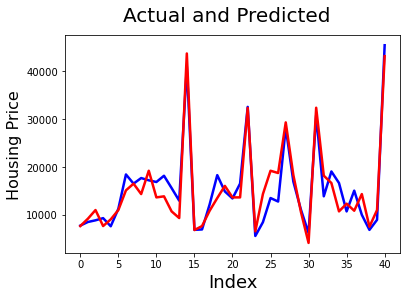

In [178]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(0,41,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

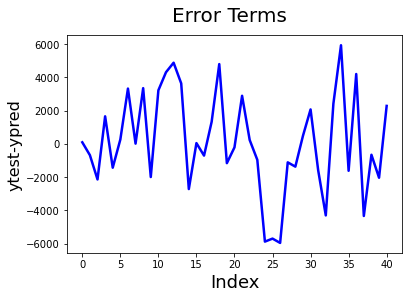

In [179]:
# Error terms
c = [i for i in range(0,41,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)  

Text(0, 0.5, 'y_pred')

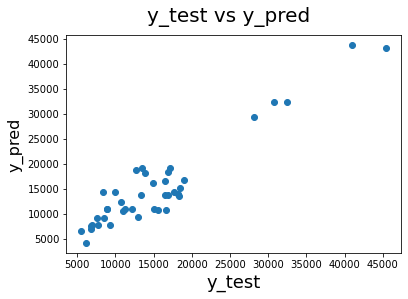

In [180]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

C:\Users\user\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Index')

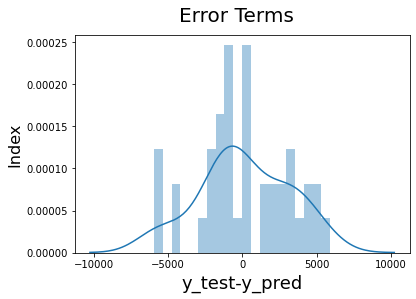

In [181]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=20)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

#####################################################################
## Data set is small, so just trying the entire dataset to fit the model without training and testing samples
## using the already selected imp features

In [182]:
Full_Data_x = car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype','cylindernumber_three','enginetype_l','cylindernumber_twelve','subaru','toyota',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hardtop','sym_neg2','carbody_wagon','mercury','cylindernumber_two','peugeot',
                          'enginetype_ohcf','carwidth','boreratio','curbweight','stroke','peakrpm','cylindernumber_four','enginelocation',
                           'carbody_hatchback','enginetype_ohcv','price','stroke_bore'], axis=1)

In [183]:
Full_Data_y = car_price['price']

In [184]:
Full_Data_x = sm.add_constant(Full_Data_x)
lm_fulldata = sm.OLS(Full_Data_y,Full_Data_x).fit()
print(lm_fulldata.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     202.4
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           7.12e-94
Time:                        22:12:34   Log-Likelihood:                -1893.0
No. Observations:                 205   AIC:                             3806.
Df Residuals:                     195   BIC:                             3839.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5519.9657    677.958  

In [185]:
vif_cal(input_data=car_price.drop(['doornumber','carlength','citympg','highwaympg',
                          'sym_1','sym_2','sym_neg1','chevrolet','dodge','honda','jaguar','volkswagen','volvo',
                          'drivewheel_rwd','fuelsystem_mpfi','fuelsystem_spdi','fuelsystem_spfi','fuelsystem_2bbl','wheelbase',
                          'carheight','horsepower','isuzu','nissan','plymouth','mazda',
                          'enginetype_dohcv','fueltype','cylindernumber_three','enginetype_l','cylindernumber_twelve','subaru','toyota',
                          'compressionratio','sym_3','fuelsystem_idi','enginetype_ohc','cylindernumber_six',
                          'fuelsystem_4bbl','carbody_sedan','cylindernumber_five','renault','saab','drivewheel_fwd',
                          'carbody_hardtop','sym_neg2','carbody_wagon','mercury','cylindernumber_two','peugeot',
                          'enginetype_ohcf','carwidth','boreratio','curbweight','stroke','peakrpm',
                         'cylindernumber_four','enginelocation','carbody_hatchback','enginetype_ohcv',
                          'cylindernumber_three','enginetype_l','cylindernumber_twelve','subaru','stroke_bore'], axis=1),
                          dependent_col="price")

,Var,Vif
1,enginesize,1.66
0,aspiration,1.37
4,buick,1.18
5,mitsubishi,1.12
3,bmw,1.10
6,porsche,1.08
2,audi,1.05
8,fuelsystem_mfi,1.03
7,enginetype_rotor,1.01


## No Multicollinearity and high r-quare value of .903 and adjusted r-square of 0.899